<a href="https://colab.research.google.com/github/burakakay/SP-500-Price-Predictor-Project/blob/main/S%26P_500_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **S&P 500 Price Predictor**
## **Intro**

We have all been hearing stories from our grandparents their time was harsh and we are much more luckly compare to them but is that true.

It seems the life at that time wasn't taht easy but people can afford house and car and maybe a summer hosue. However, it is not easy right now to achieve all of those things.

I am not going into a comparison but it is obvoius that we need a better control over on our money and how to invest it. Covid alomost impacted all of the house holds in the owrld. Prices went thought the roof and everything became much more diffuclt.

On the other hand, some others saw a opportunity and invest their money when there's blood in the streets. What are we missing, what should we and what should we look and where to put our money. All of these question are running in my mind for some time and I will try to answers my questions with help of one the newest and most popuular topic "Machine Learning".


## **Summary**

First thing first, I am not a financial advisor and this is not a financial advise. It is only out curiosity and want to do a dat aproject realted with this field.

I will dig around and look at the public data and try to come up a tool that can help me to see big picture.

I am planning to look at the top 10 key metrics of the US economy and try to come up with a price prediction with some comedities.

US Economy key metrics that I have used;

*   US GDP - Seasonally Adjusted Annual Rate (Source : Federal Reserve Bank of ST. Louis → https://fred.stlouisfed.org/series/GDP/)

*   GDP - Gross Domestic Product
*   CORESTICKM159SFRBATL -
*   USFIRE -
*   CPIAUCSL -
*   IPGMFN -
*   INDPRO -
*   FPCPITOTLZGUSA -
*   MEDCPIM158SFRBCLE -
*   PERMIT -
*   DPCCRV1Q225SBEA -
*   DPCCRGM1M225SBEA -
*   DPCCRAM1M225NBEA -
*   TOTALSA -
*   U2RATE -
*   LNS13026638 -
*   NROU -
*   UNRATE -
*   CPALTT01USM657N -
*   FPCPITOTLZGUSA -
*   MSACSR -
*   HNFSEPUSSA -
*   GDPC1 -
*   CORESTICKM159SFRBATL -

Price that I will look at and try to estimate ;

*   S&P 500

Let's get going ....


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data

We will use the data from Federal Reserve Bank of ST. LOUIS which is publicly available everyone. If you want a look at the details please have a look with the link below.

Link → https://fred.stlouisfed.org/



In [2]:
#Importing the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import sklearn
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, XGBRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

!pip install lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
# Read the data from google drive

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project 5 - Creating a Finacial Indicator/S&P 500 Historical Results Price Data with Indicators.csv")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,GDP,CORESTICKM159SFRBATL,USFIRE,...,U2RATE,LNS13026638,NROU,UNRATE,CPALTT01USM657N,FPCPITOTLZGUSA.1,MSACSR,HNFSEPUSSA,GDPC1,CORESTICKM159SFRBATL.1
0,01/01/1970,NaN,NaN,NaN,NaN,NaN,NaN,1051.20,6.59,3485.00,...,1.50,NaN,5.89,3.90,0.27,5.84,5.50,213.00,5300.65,6.59
1,01/02/1970,89.5,89.5,89.5,89.5,NaN,5.29%,1051.20,7.05,3497.00,...,1.70,NaN,5.89,4.20,0.53,5.84,7.20,215.00,5300.65,7.05
2,01/03/1970,89.6,89.6,89.6,89.6,NaN,0.11%,1051.20,6.99,3512.00,...,1.80,NaN,5.89,4.40,0.53,5.84,6.80,217.00,5300.65,6.99
3,01/04/1970,81.5,81.5,81.5,81.5,NaN,-9.04%,1067.38,6.82,3519.00,...,1.90,NaN,5.90,4.60,0.79,5.84,6.00,217.00,5308.16,6.82
4,01/05/1970,76.5,76.5,76.5,76.5,NaN,-6.13%,1067.38,6.95,3525.00,...,2.20,NaN,5.90,4.80,0.26,5.84,5.70,217.00,5308.16,6.95


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    656 non-null    object 
 1   Price                   655 non-null    object 
 2   Open                    655 non-null    object 
 3   High                    655 non-null    object 
 4   Low                     655 non-null    object 
 5   Vol.                    0 non-null      float64
 6   Change %                655 non-null    object 
 7   GDP                     654 non-null    float64
 8   CORESTICKM159SFRBATL    655 non-null    float64
 9   USFIRE                  655 non-null    float64
 10  CPIAUCSL                655 non-null    float64
 11  IPGMFN                  631 non-null    float64
 12  INDPRO                  655 non-null    float64
 13  FPCPITOTLZGUSA          54 non-null     float64
 14  MEDCPIM158SFRBCLE       499 non-null    fl

In [5]:
df.Date = pd.to_datetime(df.Date)
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].astype(float)
df['Change %'] = df['Change %'].str.replace('%','')
df['Change %'] = df['Change %'].astype(float)
df['High'] = df['High'].str.replace(',','')
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].str.replace(',','')
df['Low'] = df['Low'].astype(float)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,GDP,CORESTICKM159SFRBATL,USFIRE,...,U2RATE,LNS13026638,NROU,UNRATE,CPALTT01USM657N,FPCPITOTLZGUSA.1,MSACSR,HNFSEPUSSA,GDPC1,CORESTICKM159SFRBATL.1
0,1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1051.20,6.59,3485.00,...,1.50,NaN,5.89,3.90,0.27,5.84,5.50,213.00,5300.65,6.59
1,1970-01-02,89.50,89.5,89.50,89.50,NaN,5.29,1051.20,7.05,3497.00,...,1.70,NaN,5.89,4.20,0.53,5.84,7.20,215.00,5300.65,7.05
2,1970-01-03,89.60,89.6,89.60,89.60,NaN,0.11,1051.20,6.99,3512.00,...,1.80,NaN,5.89,4.40,0.53,5.84,6.80,217.00,5300.65,6.99
3,1970-01-04,81.50,81.5,81.50,81.50,NaN,-9.04,1067.38,6.82,3519.00,...,1.90,NaN,5.90,4.60,0.79,5.84,6.00,217.00,5308.16,6.82
4,1970-01-05,76.50,76.5,76.50,76.50,NaN,-6.13,1067.38,6.95,3525.00,...,2.20,NaN,5.90,4.80,0.26,5.84,5.70,217.00,5308.16,6.95


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    656 non-null    datetime64[ns]
 1   Price                   655 non-null    float64       
 2   Open                    655 non-null    object        
 3   High                    655 non-null    float64       
 4   Low                     655 non-null    float64       
 5   Vol.                    0 non-null      float64       
 6   Change %                655 non-null    float64       
 7   GDP                     654 non-null    float64       
 8   CORESTICKM159SFRBATL    655 non-null    float64       
 9   USFIRE                  655 non-null    float64       
 10  CPIAUCSL                655 non-null    float64       
 11  IPGMFN                  631 non-null    float64       
 12  INDPRO                  655 non-null    float64   

In [6]:
df_1 = df.drop(['Vol.','FPCPITOTLZGUSA','Open','LNS13026638','MEDCPIM158SFRBCLE'],axis=1)
df_1.drop(df_1.head(1).index, inplace = True)
df_1.drop(df_1.tail(1).index, inplace = True)
df_1['Range'] = df_1['High']-df_1['Low']
df_1.head(20)

,Date,Price,High,Low,Change %,GDP,CORESTICKM159SFRBATL,USFIRE,CPIAUCSL,IPGMFN,...,U2RATE,NROU,UNRATE,CPALTT01USM657N,FPCPITOTLZGUSA.1,MSACSR,HNFSEPUSSA,GDPC1,CORESTICKM159SFRBATL.1,Range
1,1970-01-02,89.50,89.50,89.50,5.29,1051.20,7.05,3497.00,38.10,NaN,...,1.70,5.89,4.20,0.53,5.84,7.20,215.00,5300.65,7.05,0.00
2,1970-01-03,89.60,89.60,89.60,0.11,1051.20,6.99,3512.00,38.30,NaN,...,1.80,5.89,4.40,0.53,5.84,6.80,217.00,5300.65,6.99,0.00
3,1970-01-04,81.50,81.50,81.50,-9.04,1067.38,6.82,3519.00,38.50,NaN,...,1.90,5.90,4.60,0.79,5.84,6.00,217.00,5308.16,6.82,0.00
4,1970-01-05,76.50,76.50,76.50,-6.13,1067.38,6.95,3525.00,38.60,NaN,...,2.20,5.90,4.80,0.26,5.84,5.70,217.00,5308.16,6.95,0.00
5,1970-01-06,72.70,72.70,72.70,-4.97,1067.38,7.15,3528.00,38.80,NaN,...,2.20,5.90,4.90,0.52,5.84,5.50,217.00,5308.16,7.15,0.00
6,1970-01-07,78.00,78.00,78.00,7.29,1086.06,7.01,3534.00,38.90,NaN,...,2.20,5.92,5.00,0.52,5.84,5.40,220.00,5357.08,7.01,0.00
7,1970-01-08,81.50,81.50,81.50,4.49,1086.06,7.11,3538.00,39.00,NaN,...,2.30,5.92,5.10,0.00,5.84,5.10,218.00,5357.08,7.11,0.00
8,1970-01-09,84.20,84.20,84.20,3.31,1086.06,7.08,3548.00,39.20,NaN,...,2.50,5.92,5.40,0.51,5.84,4.70,218.00,5357.08,7.08,0.00
9,1970-01-10,83.20,83.20,83.20,-1.19,1088.61,7.06,3556.00,39.40,NaN,...,2.70,5.93,5.50,0.51,5.84,4.80,216.00,5299.67,7.06,0.00
10,1970-01-11,87.20,87.20,87.20,4.81,1088.61,7.33,3568.00,39.60,NaN,...,2.80,5.93,5.90,0.51,5.84,4.60,212.00,5299.67,7.33,0.00


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 1 to 654
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    654 non-null    datetime64[ns]
 1   Price                   654 non-null    float64       
 2   High                    654 non-null    float64       
 3   Low                     654 non-null    float64       
 4   Change %                654 non-null    float64       
 5   GDP                     653 non-null    float64       
 6   CORESTICKM159SFRBATL    654 non-null    float64       
 7   USFIRE                  654 non-null    float64       
 8   CPIAUCSL                654 non-null    float64       
 9   IPGMFN                  631 non-null    float64       
 10  INDPRO                  654 non-null    float64       
 11  PERMIT                  654 non-null    float64       
 12  DPCCRV1Q225SBEA         653 non-null    float64   

In [14]:
df_1.describe()

,Date,Price,High,Low,Change %,GDP,CORESTICKM159SFRBATL,USFIRE,CPIAUCSL,IPGMFN,...,U2RATE,NROU,UNRATE,CPALTT01USM657N,FPCPITOTLZGUSA.1,MSACSR,HNFSEPUSSA,GDPC1,CORESTICKM159SFRBATL.1,Range
count,652,652.00,652.00,652.00,652.00,652.00,652.00,652.00,652.00,629.00,...,652.00,652.00,652.00,650.00,647.00,652.00,652.00,652.00,652.00,652.00
mean,1996-10-07 08:25:46.012269952,1087.67,1117.37,1043.48,0.73,10135.24,4.29,6805.24,158.85,74.56,...,3.15,5.38,6.11,0.33,4.03,6.21,327.72,12819.15,4.29,73.89
min,1970-01-02 00:00:00,63.50,63.50,63.50,-21.75,1051.20,0.66,3497.00,38.10,34.67,...,1.50,4.41,3.40,-1.92,-0.36,3.30,142.00,5299.67,0.66,0.00
25%,1983-01-08 18:00:00,159.88,163.53,151.75,-1.79,3689.18,2.44,5380.75,100.33,50.23,...,2.30,4.83,4.90,0.12,2.19,4.90,282.00,7719.75,2.44,10.10
50%,1997-01-03 12:00:00,788.50,816.30,734.00,1.01,8440.74,3.27,7179.00,159.85,83.51,...,2.70,5.34,5.80,0.30,3.21,6.00,328.50,12216.35,3.27,42.95
75%,2010-01-10 06:00:00,1407.22,1440.55,1351.17,3.58,15309.47,5.05,8100.25,219.17,97.93,...,3.80,6.01,7.20,0.52,4.83,7.20,368.00,16943.29,5.05,92.32
max,2024-01-05 00:00:00,5277.51,5341.88,5056.82,16.38,28652.34,15.77,9235.00,313.23,108.33,...,13.20,6.24,14.80,1.81,13.55,12.20,572.00,22924.86,15.77,944.86
std,NaN,1164.09,1195.37,1115.03,4.43,7297.90,2.72,1642.78,73.69,23.78,...,1.30,0.61,1.71,0.37,2.84,1.73,84.32,5167.42,2.72,101.23


In [13]:
df_1.drop(df_1.tail(2).index,inplace=True)

In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 1 to 652
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    652 non-null    datetime64[ns]
 1   Price                   652 non-null    float64       
 2   High                    652 non-null    float64       
 3   Low                     652 non-null    float64       
 4   Change %                652 non-null    float64       
 5   GDP                     652 non-null    float64       
 6   CORESTICKM159SFRBATL    652 non-null    float64       
 7   USFIRE                  652 non-null    float64       
 8   CPIAUCSL                652 non-null    float64       
 9   IPGMFN                  629 non-null    float64       
 10  INDPRO                  652 non-null    float64       
 11  PERMIT                  652 non-null    float64       
 12  DPCCRV1Q225SBEA         652 non-null    float64   

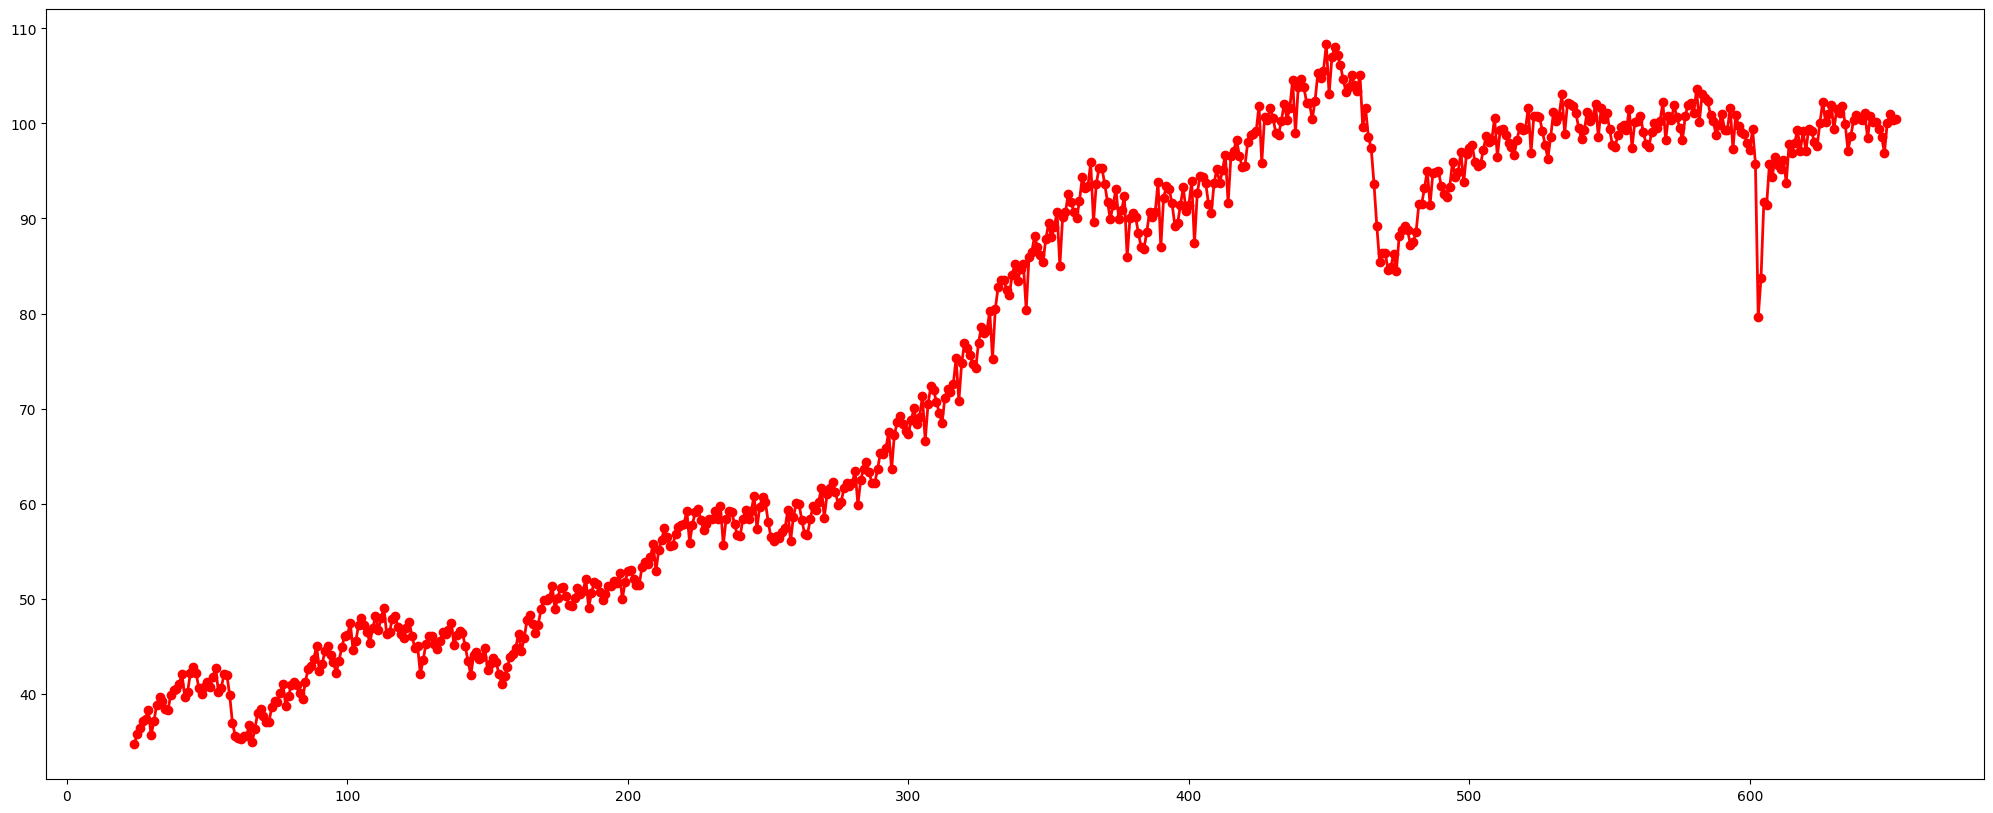

In [25]:
plt.figure(figsize=[25,10])
plt.plot(df_1.index,df_1.IPGMFN,label='IPGMFN',  color='red', linewidth=2, marker='o')
plt.show()

In [33]:
df_2 = df_1.apply(lambda x: x.fillna(x.mean()),axis=0)
df_2.drop(['Date'],axis=1,inplace=True)

In [34]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 1 to 652
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   652 non-null    float64
 1   High                    652 non-null    float64
 2   Low                     652 non-null    float64
 3   Change %                652 non-null    float64
 4   GDP                     652 non-null    float64
 5   CORESTICKM159SFRBATL    652 non-null    float64
 6   USFIRE                  652 non-null    float64
 7   CPIAUCSL                652 non-null    float64
 8   IPGMFN                  652 non-null    float64
 9   INDPRO                  652 non-null    float64
 10  PERMIT                  652 non-null    float64
 11  DPCCRV1Q225SBEA         652 non-null    float64
 12  DPCCRGM1M225SBEA        652 non-null    float64
 13  DPCCRAM1M225NBEA        652 non-null    float64
 14  TOTALSA                 652 non-null    fl

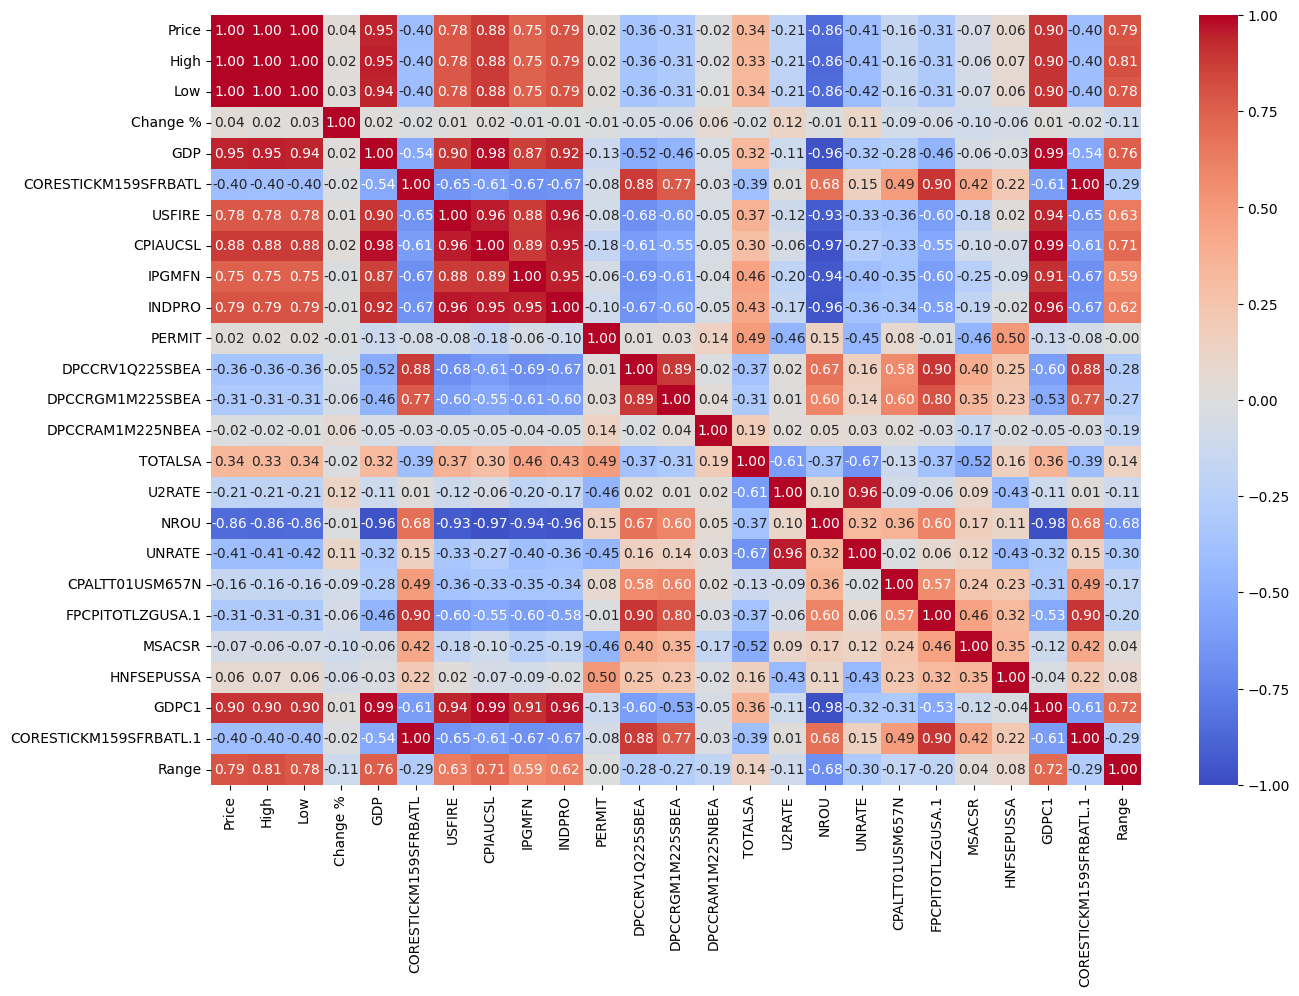

In [35]:
plt.figure(figsize=[15,10])
sns.heatmap(df_2.corr(), cmap="coolwarm", annot=True, vmin=-1, vmax=1, fmt='.2f')
plt.show()

In [36]:
df_2.columns

Index(['Price', 'High', 'Low', 'Change %', 'GDP', 'CORESTICKM159SFRBATL',
       'USFIRE', 'CPIAUCSL', 'IPGMFN', 'INDPRO', 'PERMIT', 'DPCCRV1Q225SBEA',
       'DPCCRGM1M225SBEA', 'DPCCRAM1M225NBEA', 'TOTALSA', 'U2RATE', 'NROU',
       'UNRATE', 'CPALTT01USM657N', 'FPCPITOTLZGUSA.1', 'MSACSR', 'HNFSEPUSSA',
       'GDPC1', 'CORESTICKM159SFRBATL.1', 'Range'],
      dtype='object')

In [38]:
df_3 = df_2[['Price', 'GDP', 'CORESTICKM159SFRBATL', 'USFIRE', 'CPIAUCSL', 'IPGMFN','INDPRO','DPCCRV1Q225SBEA', 'TOTALSA', 'NROU', 'UNRATE', 'CPALTT01USM657N'].copy()]
df_3.head(10)

,Price,GDP,CORESTICKM159SFRBATL,USFIRE,CPIAUCSL,IPGMFN,INDPRO,DPCCRV1Q225SBEA,TOTALSA,NROU,UNRATE,CPALTT01USM657N
1,89.50,1051.20,7.05,3497.00,38.10,74.56,37.90,4.40,15.16,5.89,4.20,0.53
2,89.60,1051.20,6.99,3512.00,38.30,74.56,37.85,4.40,15.16,5.89,4.40,0.53
3,81.50,1067.38,6.82,3519.00,38.50,74.56,37.76,4.60,15.16,5.90,4.60,0.79
4,76.50,1067.38,6.95,3525.00,38.60,74.56,37.71,4.60,15.16,5.90,4.80,0.26
5,72.70,1067.38,7.15,3528.00,38.80,74.56,37.59,4.60,15.16,5.90,4.90,0.52
6,78.00,1086.06,7.01,3534.00,38.90,74.56,37.68,4.50,15.16,5.92,5.00,0.52
7,81.50,1086.06,7.11,3538.00,39.00,74.56,37.62,4.50,15.16,5.92,5.10,0.00
8,84.20,1086.06,7.08,3548.00,39.20,74.56,37.36,4.50,15.16,5.92,5.40,0.51
9,83.20,1088.61,7.06,3556.00,39.40,74.56,36.61,5.80,15.16,5.93,5.50,0.51
10,87.20,1088.61,7.33,3568.00,39.60,74.56,36.39,5.80,15.16,5.93,5.90,0.51


In [39]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 1 to 652
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 652 non-null    float64
 1   GDP                   652 non-null    float64
 2   CORESTICKM159SFRBATL  652 non-null    float64
 3   USFIRE                652 non-null    float64
 4   CPIAUCSL              652 non-null    float64
 5   IPGMFN                652 non-null    float64
 6   INDPRO                652 non-null    float64
 7   DPCCRV1Q225SBEA       652 non-null    float64
 8   TOTALSA               652 non-null    float64
 9   NROU                  652 non-null    float64
 10  UNRATE                652 non-null    float64
 11  CPALTT01USM657N       652 non-null    float64
dtypes: float64(12)
memory usage: 61.3 KB


Text(0.5, 1.0, 'Price')

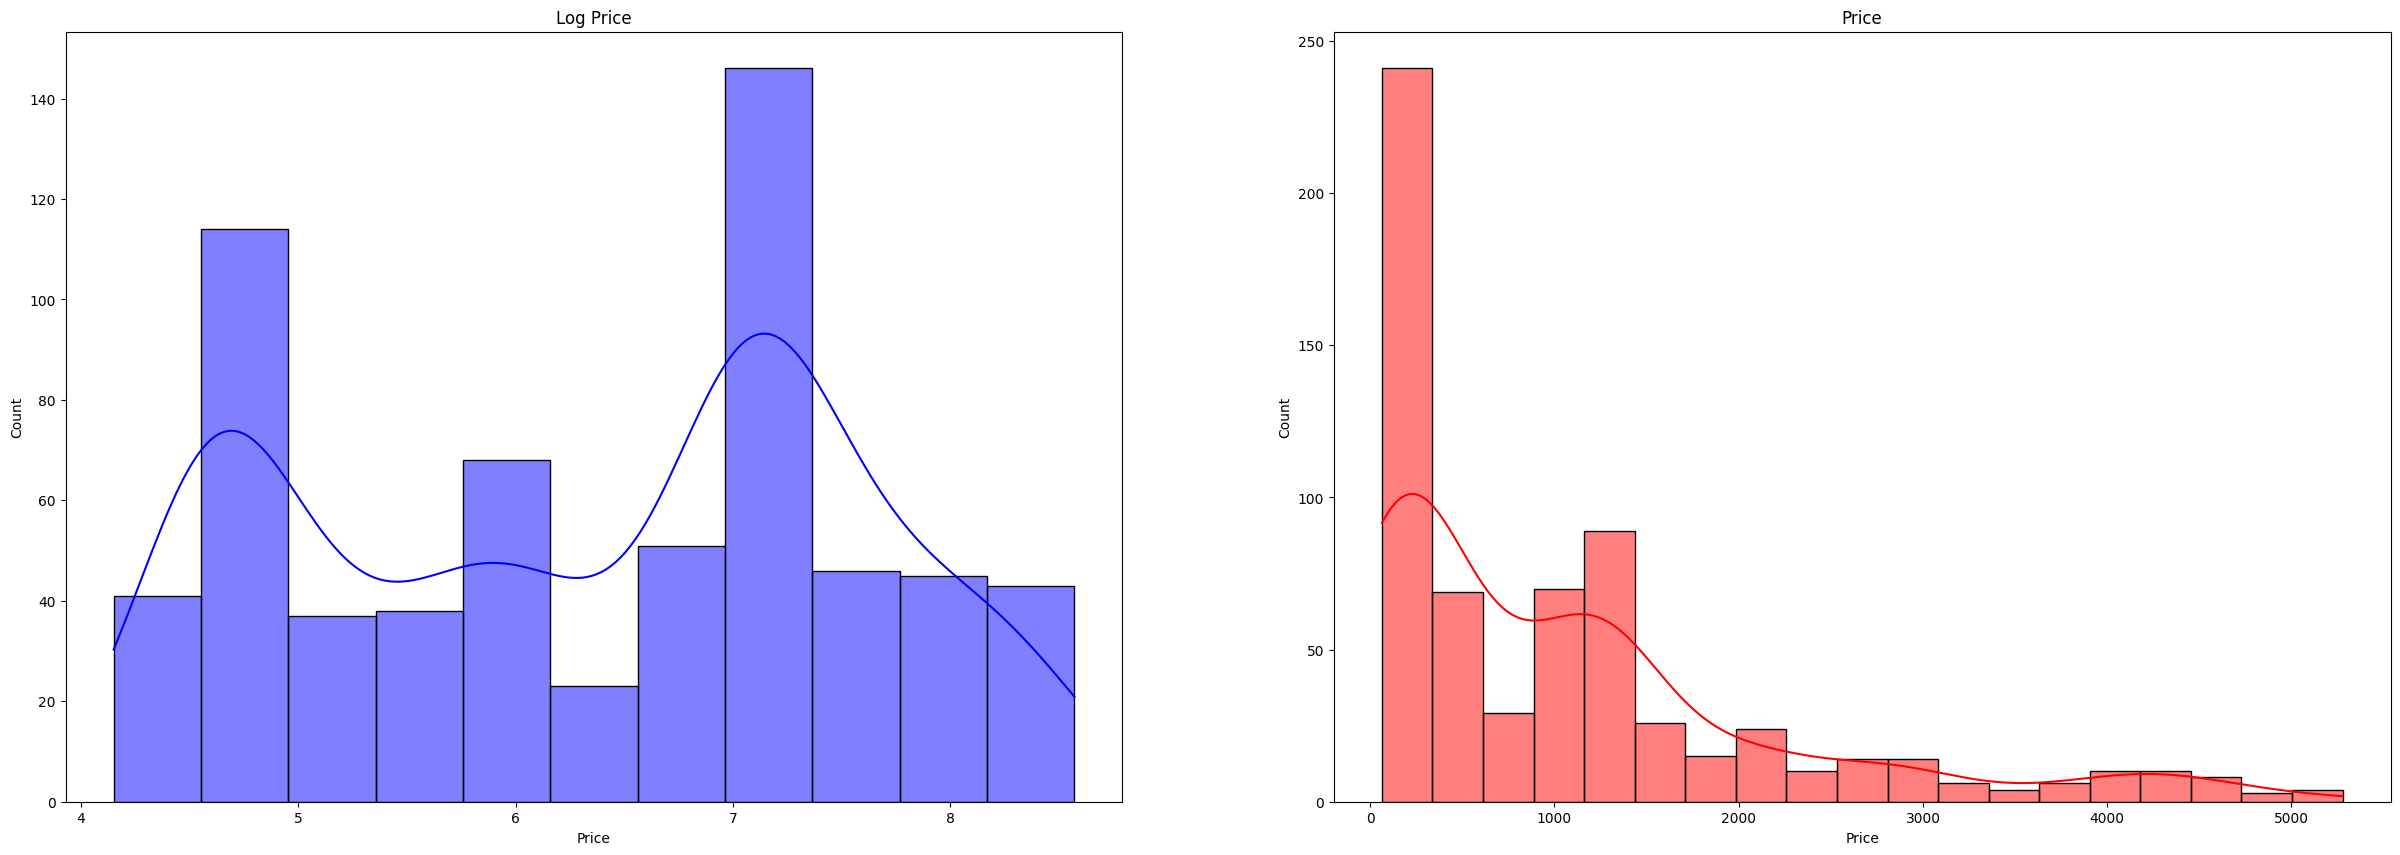

In [41]:
fig,axes = plt.subplots(1,2,figsize=(30,10))

sns.histplot(np.log(df_3['Price']), color='blue', kde=True, ax=axes[0])
axes[0].set_title('Log Price')

sns.histplot(df_3['Price'], color='red', kde=True, ax=axes[1])
axes[1].set_title('Price')

In [42]:
df_3['log_Price'] = np.log(df_2['Price'])

In [43]:
df_3.columns

Index(['Price', 'GDP', 'CORESTICKM159SFRBATL', 'USFIRE', 'CPIAUCSL', 'IPGMFN',
       'INDPRO', 'DPCCRV1Q225SBEA', 'TOTALSA', 'NROU', 'UNRATE',
       'CPALTT01USM657N', 'log_Price'],
      dtype='object')

In [45]:
x = df_3 [['GDP', 'CORESTICKM159SFRBATL', 'USFIRE', 'CPIAUCSL', 'IPGMFN',
       'INDPRO', 'DPCCRV1Q225SBEA', 'TOTALSA', 'NROU', 'UNRATE',
       'CPALTT01USM657N']]

y = df_3['log_Price']


x_train, x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train : ",x_train.shape)
print("x_test : ",x_test.shape)
print("Y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

x_train :  (521, 11)
x_test :  (131, 11)
Y_train :  (521,)
y_test :  (131,)


In [46]:
reg = LazyRegressor(verbose=0,
					ignore_warnings=False,
					custom_metric=None)

# fitting data in LazyClassifier
models, predictions = reg.fit(x_train, x_test,
							y_train, y_test)
print(models)

 79%|███████▊  | 33/42 [00:02<00:00, 14.71it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:06<00:00,  6.30it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1640
[LightGBM] [Info] Number of data points in the train set: 521, number of used features: 11
[LightGBM] [Info] Start training from score 6.356369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor(random_state=42,)
etr_model.fit(x_train, y_train)

y_pred = etr_model.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE: 0.049247187113464125
R2 Score: 0.9986392211242447


In [49]:
etr_model.fit(x,y)

log_price_prediction = etr_model.predict(x)

rmse = np.sqrt(mean_squared_error(y, log_price_prediction))
print("RMSE:", rmse)

r2 = r2_score(y, log_price_prediction)
print("R2 Score:", r2)

RMSE: 8.841027917153703e-15
R2 Score: 1.0


In [63]:
df_3['etr_log_pred'] = pd.DataFrame(log_price_prediction)

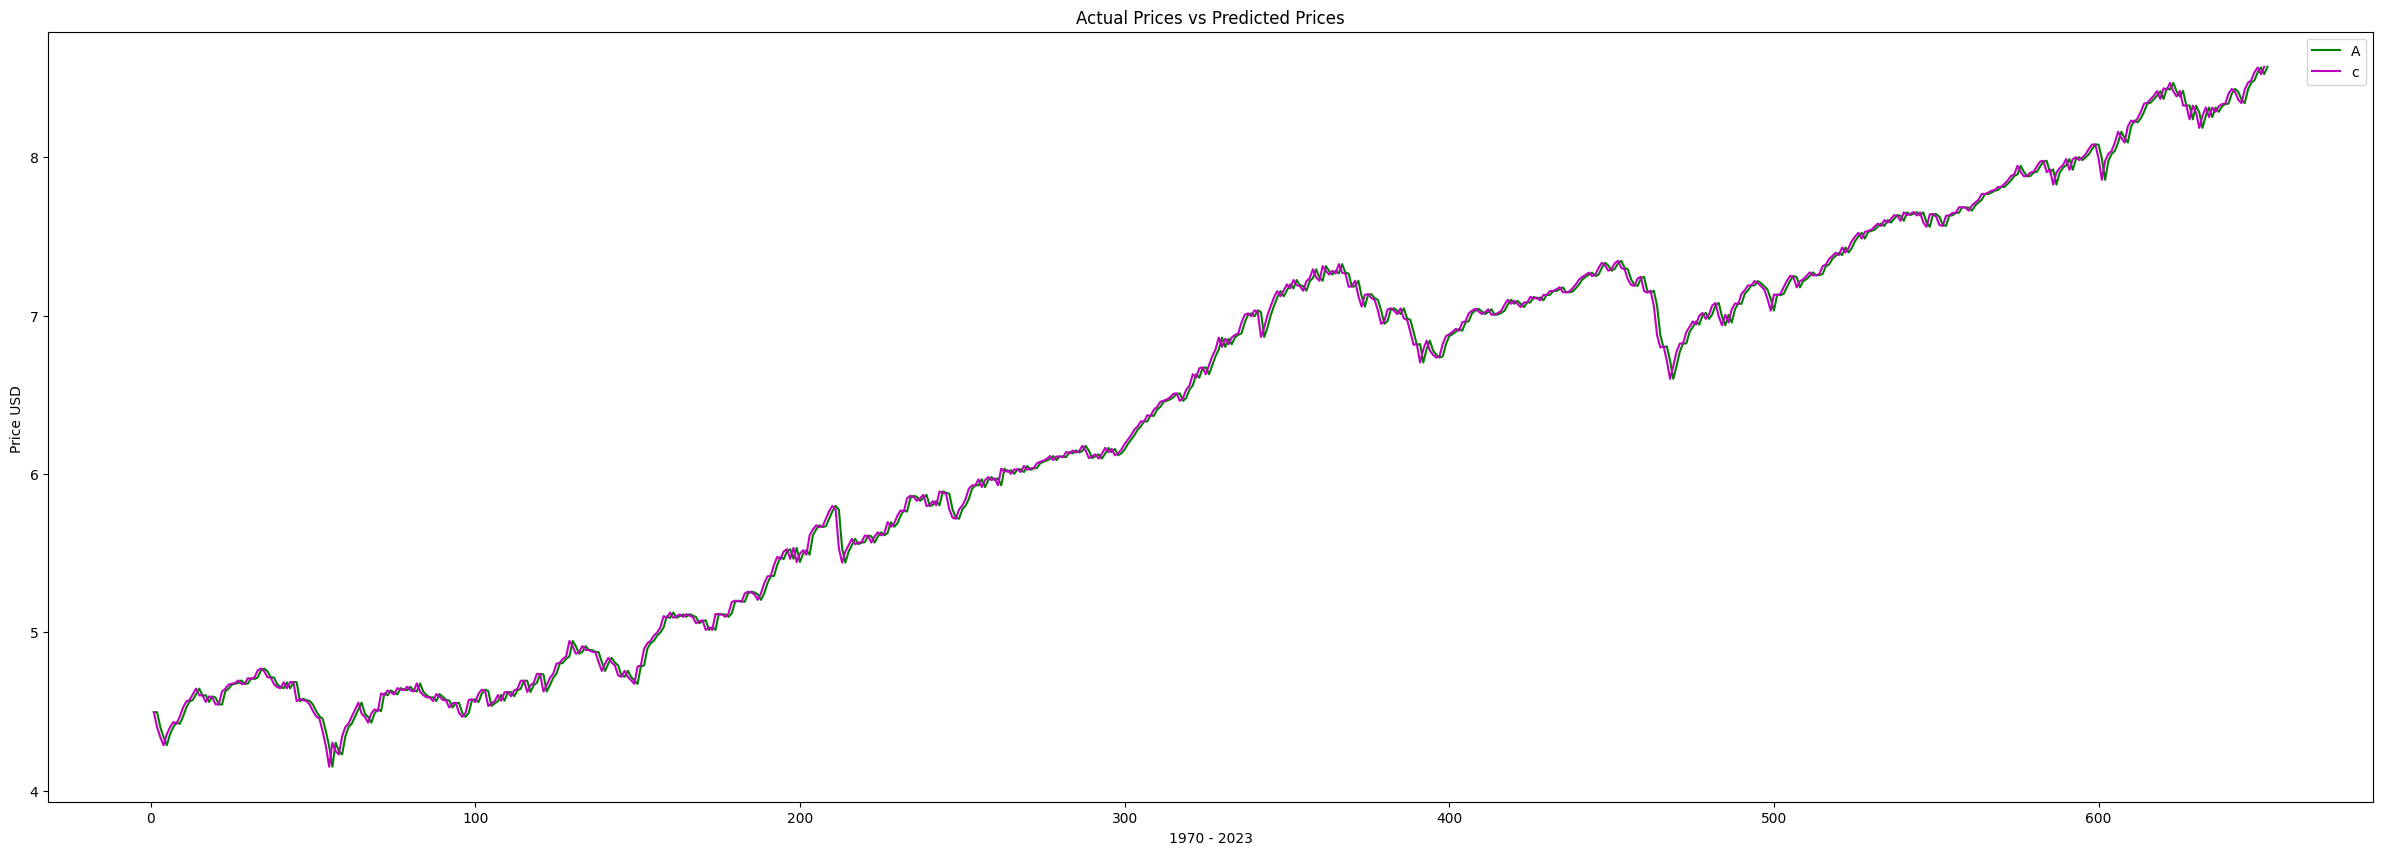

In [64]:
plt.figure(figsize=(30, 10))
plt.plot( df_3.index , df_3['log_Price'],color ='g', label='Actual Prices')

plt.plot(df_3.index, df_3.etr_log_pred, color='m', label='Predicted Prices')
#plt.plot(df_3.index, df_3.etr_prediction +82, color='m', label='Predicted Prices', linestyle='--')
#plt.plot(df_3.index, df_3.Model_Prediction -82 , color='m', label='Predicted Prices',linestyle='--')


plt.legend('Actual vs Prediction')
plt.xlabel("1970 - 2023")
plt.ylabel("Price USD ")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [66]:
df_3.etr_pred = np.exp(df_3.etr_log_pred)
df_3.etr_pred

,etr_log_pred
1,89.60
2,81.50
3,76.50
4,72.70
5,78.00
...,...
648,5096.27
649,5254.35
650,5035.69
651,5277.51


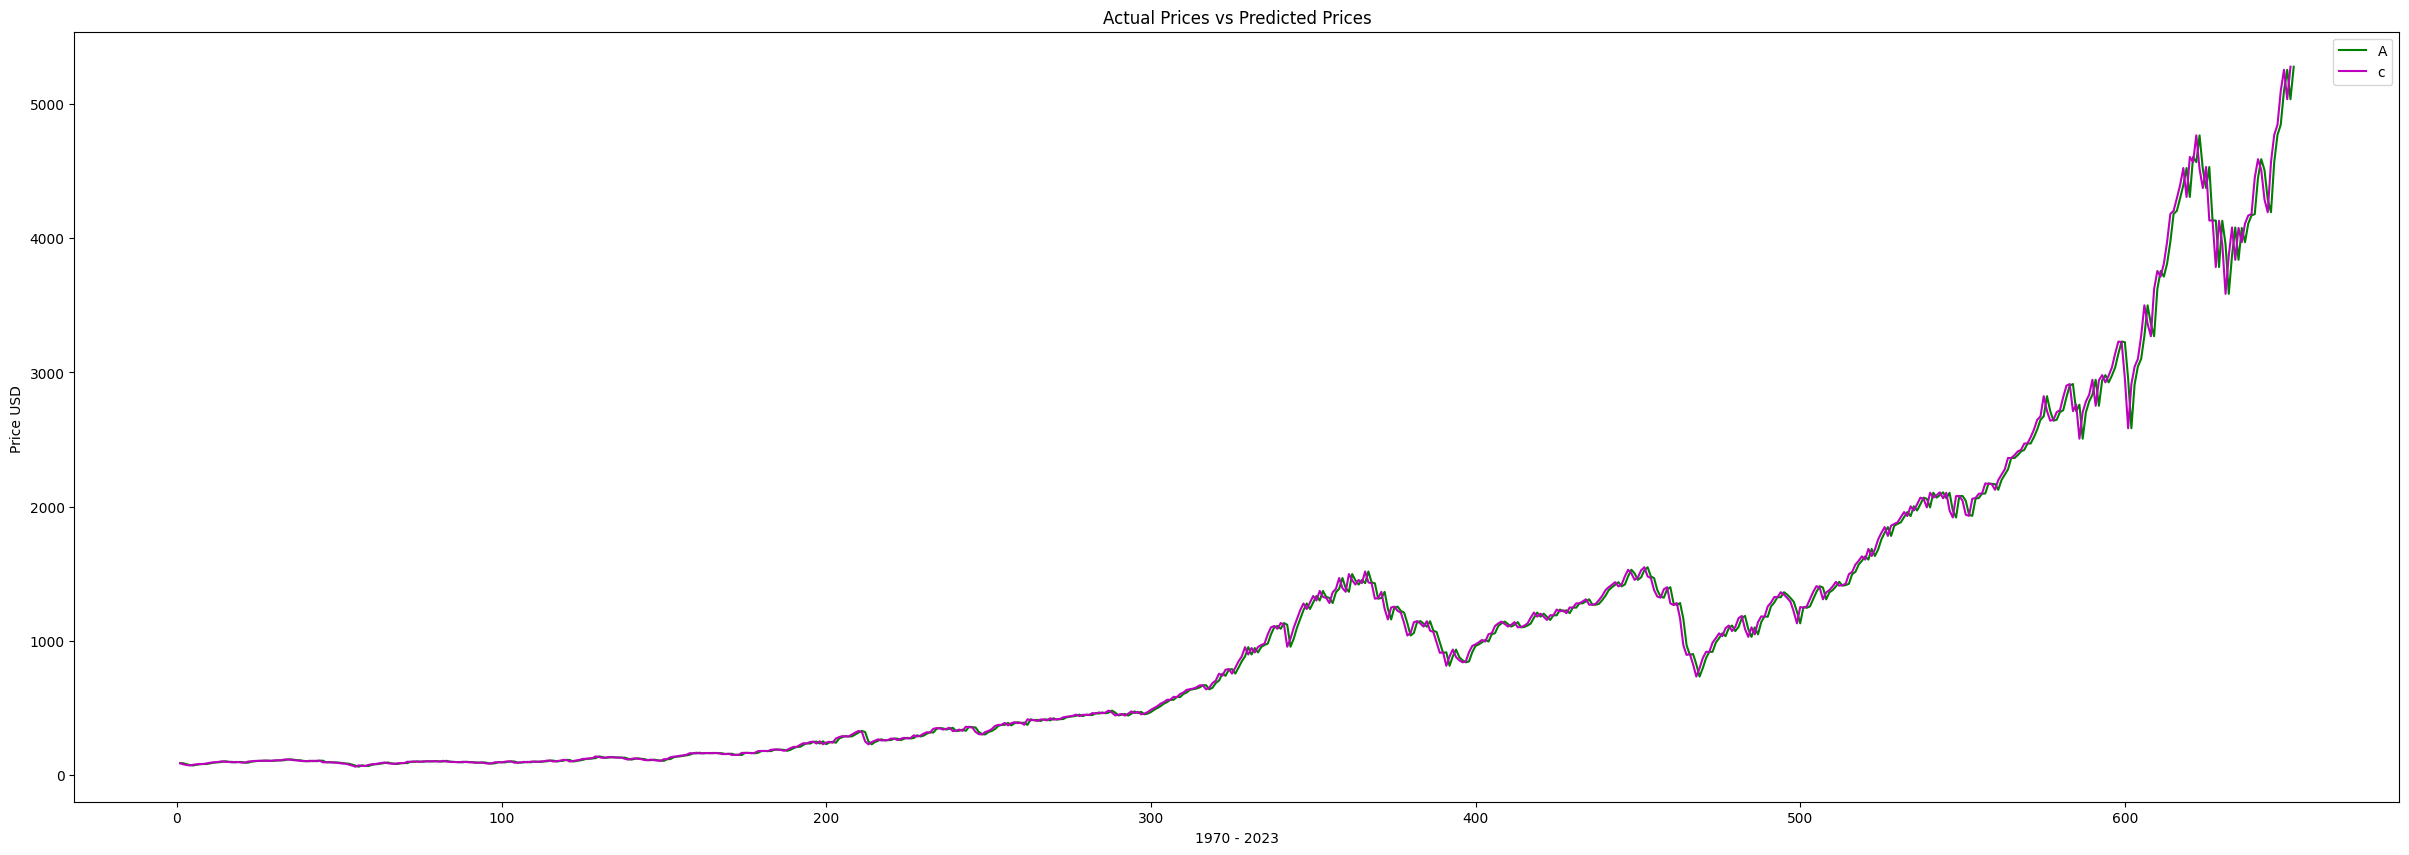

In [67]:
plt.figure(figsize=(30, 10))
plt.plot( df_3.index , df_3['Price'],color ='g', label='Actual Prices')

plt.plot(df_3.index, df_3.etr_pred, color='m', label='Predicted Prices')
#plt.plot(df_3.index, df_3.etr_prediction +82, color='m', label='Predicted Prices', linestyle='--')
#plt.plot(df_3.index, df_3.Model_Prediction -82 , color='m', label='Predicted Prices',linestyle='--')


plt.legend('Actual vs Prediction')
plt.xlabel("1970 - 2023")
plt.ylabel("Price USD ")
plt.title("Actual Prices vs Predicted Prices")
plt.show()